In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sklearn.metrics as metrics

import numpy as np
import random
import math
import os
from datetime import datetime

import DataGenerator as DG
from DataGenerator import DataGenerator

import matplotlib.pyplot as plt

import h5py

###FIX NUMPY LOAD FOR DICTIONARIES
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [3]:
filepath = "images_synthetic_mouse.h5"
destpath = "images_synthetic_mouse_uncompressed.h5"
scratch_dir = "/mnt/disks/sec/Amit/"
#Copy file to scratch directory if it is specified, and change filepath to match.
if not os.path.exists((scratch_dir+filepath)):
    copy(filepath,scratch_dir)
    print("File Copied to scratch directory")
filepath=scratch_dir+filepath
print("Using path: ",filepath)
#if os.path.exists(scratch_dir+destpath):
#    os.remove(scratch_dir+destpath)
#with h5py.File(scratch_dir+destpath,'w') as wf:
#    with h5py.File(filepath,'r') as f:
#        print("Exporting frames")
#        wf.create_dataset("/frames/raw",data=f["/frames/raw"], compression="gzip", compression_opts=0)
#        print("Exporting labels")
#        wf.create_dataset("/labels",data=f["/labels"], compression="gzip", compression_opts=0)

Using path:  /mnt/disks/sec/Amit/images_synthetic_mouse.h5


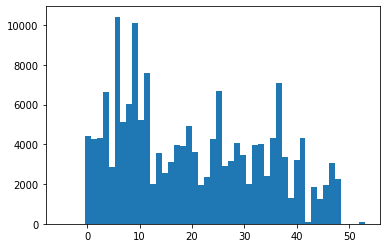

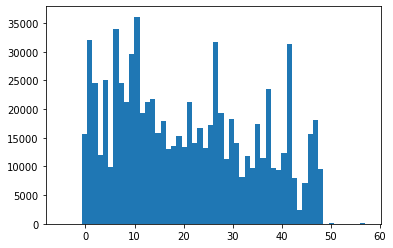

60


In [13]:
with h5py.File(filepath,'r') as f:
    #print(len(np.unique(f["/labels"])))
    depth = 10
    #data_gen = DataGenerator(filepath,data_amount=100000,batch_size=30000,frames_per_sample=depth,offset=0,sliding_window=1)
    subset = f["/labels"][700100:870100]#data_gen.__getitem__(0)#
    plt.hist(subset,len(np.unique(subset)))
    plt.show()
    subset = f["/labels"][0:800000]#data_gen.__getitem__(0)#
    plt.hist(subset,len(np.unique(subset)))
    plt.show()

In [ ]:
from distutils.sysconfig import get_python_lib
print(get_python_lib())

In [ ]:
x= 0
' ' + str((x>0)) + ' ' + str(x)

In [5]:
def create_sbatch(outdir = 'training',
                  job_name='train',
                  cores=8,
                  mem='16GB',
                  max_time='120:00:00',
                  data_file = 'images_synthetic_mouse.h5',
                  data_amount = 0,
                  data_offset = 0,
                  validation_amount = 0,
                  validation_offset = 0,
                  batch_size = 8,
                  slide = 5,
                  verbosity = 1,
                  epochs = 40,
                  dropout_chance = 0,
                  frames_per_sample = 10,
                  filters = 8,
                  optimizer = 'SGD',
                  lstm_units = 512
                 ):
    cmd = 'sbatch '
    cmd += '--job-name ' + job_name + ' '
    cmd += '--output "' + os.getcwd() + '/train-%j.log" '
    cmd += '--partition small-gpu-b-preemptible '
    cmd += '-n ' + str(cores) + ' '
    cmd += '--mem ' + mem + ' '
    cmd += '--time ' + max_time + ' '
    cmd += '--wrap="' + os.path.expanduser("~") + '/miniconda3/envs/tf2_gpu/bin/python train_model.py train '
    cmd += '--data-amount ' + str(data_amount) + ' '
    cmd += '--data-offset ' + str(data_offset) + ' '
    cmd += '--validation-amount ' + str(validation_amount) + ' '
    cmd += '--validation-offset ' + str(validation_offset) + ' '
    cmd += '--batch-size ' + str(batch_size) + ' '
    cmd += '--slide ' + str(slide) + ' '
    cmd += '--verbosity ' + str(verbosity) + ' '
    cmd += '--epochs ' + str(epochs) + ' '
    cmd += '--depth ' + str(frames_per_sample) + ' '
    cmd += '--dropout ' + str(dropout_chance) + ' '
    cmd += '--filters ' + str(filters) + ' '
    cmd += '--lstm-units ' + str(lstm_units) + ' '
    cmd += '--optimizer ' + optimizer + ' '
    cmd += "'" + data_file +"' "
    cmd += "'" + os.getcwd() + '/' + outdir + '-%s/' +"' "
    cmd += '"'
    return cmd
for i in range(0,5):
    lstm_units = 2**(i+7)
    for j in range(0,5):
        #os.system(create_sbatch(data_file=filepath,
        #          outdir='training-'+str(i)+'-'+str(j),
        #          data_amount = 800000,
        #          data_offset = 0,
        #          validation_amount=30000,
        #          validation_offset=800100,
        #          slide = 1,
        #          dropout_chance=j/10,
        #          filters = 16,
        #          epochs=8,
        #          verbosity=0,
        #          lstm_units=lstm_units))
        pass

sbatch --job-name train --output "/home/g17amitprasad_gmail_com/2019-notebooks/Action Recognition/train-%j.log" --partition debug -n 16 --mem 48GB --time 120:00:00 --gres gpu:1 --wrap="/home/g17amitprasad_gmail_com/miniconda3/envs/tf2_gpu/bin/python train_model.py train --data-amount 500000 --data-offset 100000 --validation-amount 10000 --validation-offset 1000000 --batch-size 8 --slide 1 --verbosity 0 --epochs 50 --depth 10 --dropout 0.1 --filters 32 --optimizer RMSProp '/home/g17amitprasad_gmail_com/2019-notebooks/Action Recognition/images_synthetic_mouse.h5' '/home/g17amitprasad_gmail_com/2019-notebooks/Action Recognition/training-%s/' "
